# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head()

C:\Users\lawew\OneDrive\Documents\New folder\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


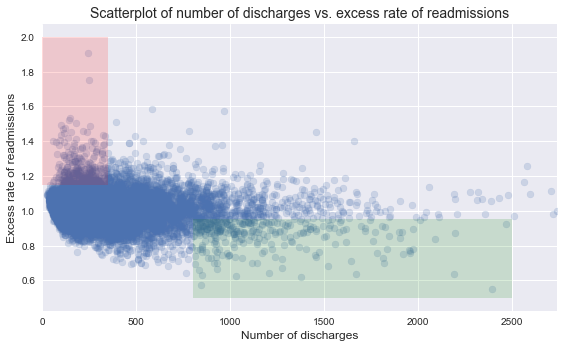

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [6]:
# Your turn
from scipy import stats
import seaborn as sns

In [7]:
df = clean_hospital_read_df

In [8]:
set(df['Measure Name'])

{'READM-30-AMI-HRRP',
 'READM-30-COPD-HRRP',
 'READM-30-HF-HRRP',
 'READM-30-HIP-KNEE-HRRP',
 'READM-30-PN-HRRP'}

In [13]:
df_new = df[(df['Measure Name'] == 'READM-30-AMI-HRRP') | (df['Measure Name'] == 'READM-30-HF-HRRP') | (df['Measure Name'] == 'READM-30-PN-HRRP')]
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


## 1. Setup an appropriate hypothesis test.

The null hypothesis will be that the excess readmission ratios will be the same for both large and small hospitals and the alternative hypothesis being that they are not thee samed. To test this I will use a Chi-Squared test.

### Actual count

In [31]:
#number of Small Hospitals with Excess Readmission Ratio greater than or equal to 1
sm_hospitals = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
sm_obs = sm_hospitals[sm_hospitals['Excess Readmission Ratio'] >= 1]['Excess Readmission Ratio'].count()
sm_obs

753

In [29]:
# Total number of small hospitals
total_sm_hospitals = sm_hospitals['Excess Readmission Ratio'].count()
total_sm_hospitals

1188

In [33]:
#difference in the total number of small hospitals and small hospitals with excess readmission ratio greater than 1
diff_sm_hospitals = total_sm_hospitals - sm_obs
diff_sm_hospitals

435

In [35]:
#number of Large Hospitals with Excess Readmission Ratio greater than or equal to 1
lg_hospitals = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
lg_obs = lg_hospitals[lg_hospitals['Excess Readmission Ratio'] >= 1]['Excess Readmission Ratio'].count()
lg_obs

206

In [36]:
# Total number of large hospitals
total_lg_hospitals = lg_hospitals['Excess Readmission Ratio'].count()
total_lg_hospitals

463

In [37]:
#difference in the total number of small hospitals and small hospitals with excess readmission ratio greater than 1
diff_lg_hospitals = total_lg_hospitals - lg_obs
diff_lg_hospitals

257

### Expected count

In [43]:
#Expected amount of small hospitals with an excess readmission ratio greater than 1
expec_sm_hospitals = np.round(.63 * total_sm_hospitals)
expec_sm_hospitals

748.0

In [45]:
#small hospitals with excess readmission rate less than 1
expec_sm_hospitals_lower = total_sm_hospitals - expec_sm_hospitals
expec_sm_hospitals_lower

440.0

In [46]:
#Expected amount of large hospitals with an excess readmission ratio greater than 1
expec_lg_hospitals = np.round(.63 * total_lg_hospitals)
expec_lg_hospitals

292.0

In [47]:
#large hospitals with excess readmission rate less than 1
expec_lg_hospitals_lower = total_lg_hospitals - expec_lg_hospitals
expec_lg_hospitals_lower

171.0

In [48]:
obs = [sm_obs, diff_sm_hospitals, lg_obs, diff_lg_hospitals]
exp = [expec_sm_hospitals, expec_sm_hospitals_lower, expec_lg_hospitals, expec_lg_hospitals_lower]

## 2. Compute and report the observed significance value (or p-value).

### Chi-Squared Test

In [49]:
stats.chisquare(obs, exp, ddof=1)

Power_divergenceResult(statistic=68.670469753302996, pvalue=1.2257360470116773e-15)

## 3. Report statistical significance for  αα  = .01
From the results of the Chi-Squared test, the null hypothesis that the excess readmission ratios for small and large hospitals would be the same is rejected. 

The chi-squared value with and alpha value equal to 0.01 is 6.43. The test statisic calculated in the chi-squared test is 68.67. Because the test statistic is greater than the chi-squared value, it confirms that the null hypothesis is reject.

## 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance refers to the unlikelihood that the result is obtained by chance, i.e., probability of relationship between two variables exists. Practical significance refers to the relationship between the variables and the real world situation.

They differ here because the sample size for both the large and small hospitals are dramaticallys different. There could also be multiple different resaons a paitent would need to be readmitted into a hospital that are not considered in this analysis.

I would suggest to the client that not many suggestions can be confirmed until the sample sizes are larger.

## 5. Look at the scatterplot above. 

### What are the advantages and disadvantages of using this plot to convey information?

Advantages: Shows good areas and bad areas with good coloring

Disadvantages: heavy plot density, hard to make comcnlusions

### Construct another plot that conveys the same information in a more direct manner.

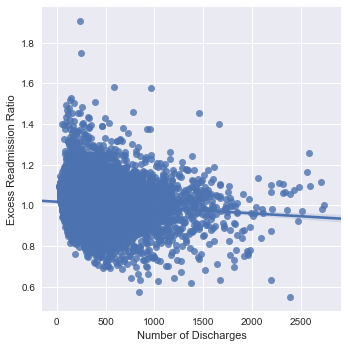

In [38]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

data = pd.DataFrame([x,y], index=['Number of Discharges', 'Excess Readmission Ratio']).transpose()

g = sns.lmplot(x='Number of Discharges', y='Excess Readmission Ratio', data=data)

In [39]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
print(slope)
print(intercept)
print(rvalue ** 2)
print(pvalue)
print(stderr)

-2.85650529438e-05
1.01794755795
0.00866678010336
1.50227564266e-23
2.84982482785e-06


The initial statement that the plot regresses downward as the number of discharges is true, but look into the data, the plot takes into consideration all paitient cases, not just heart attack, heart failure, and heart attack, heart failure, and pneumonia.

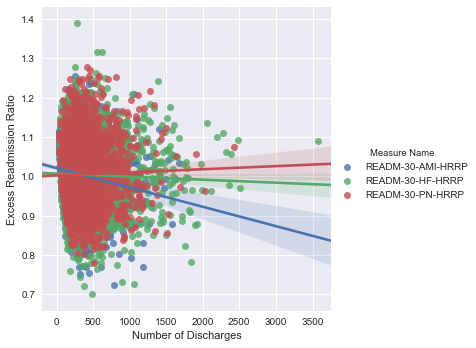

In [40]:
sns.lmplot(x='Number of Discharges', y='Excess Readmission Ratio', hue='Measure Name', data=df_new)

From the new graph it can be seen that pneumonia cases have the only clear correlation with number of discharges and excess readmission ratio.